<a href="https://colab.research.google.com/github/manshakhanna2004/Iris-Flower-CodeAlpha-/blob/main/Task%202%20sales_pred%20using%20python_(CodeAlpha).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
#load the dataset
df=pd.read_csv('Advertising.csv')
df

,Unnamed,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [ ]:
df.head()

,Unnamed,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [ ]:
df.tail()

,Unnamed,TV,Radio,Newspaper,Sales
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5
199,200,232.1,8.6,8.7,13.4


In [ ]:
print(df.columns)

Index(['Unnamed', 'TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Unnamed    200 non-null    int64  
 1   TV         200 non-null    float64
 2   Radio      200 non-null    float64
 3   Newspaper  200 non-null    float64
 4   Sales      200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [ ]:
df.isnull().sum()

,0
Unnamed,0
TV,0
Radio,0
Newspaper,0
Sales,0


In [ ]:
df.isnull()

,Unnamed,TV,Radio,Newspaper,Sales
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
195,False,False,False,False,False
196,False,False,False,False,False
197,False,False,False,False,False
198,False,False,False,False,False


In [ ]:
df.describe()

,Unnamed,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


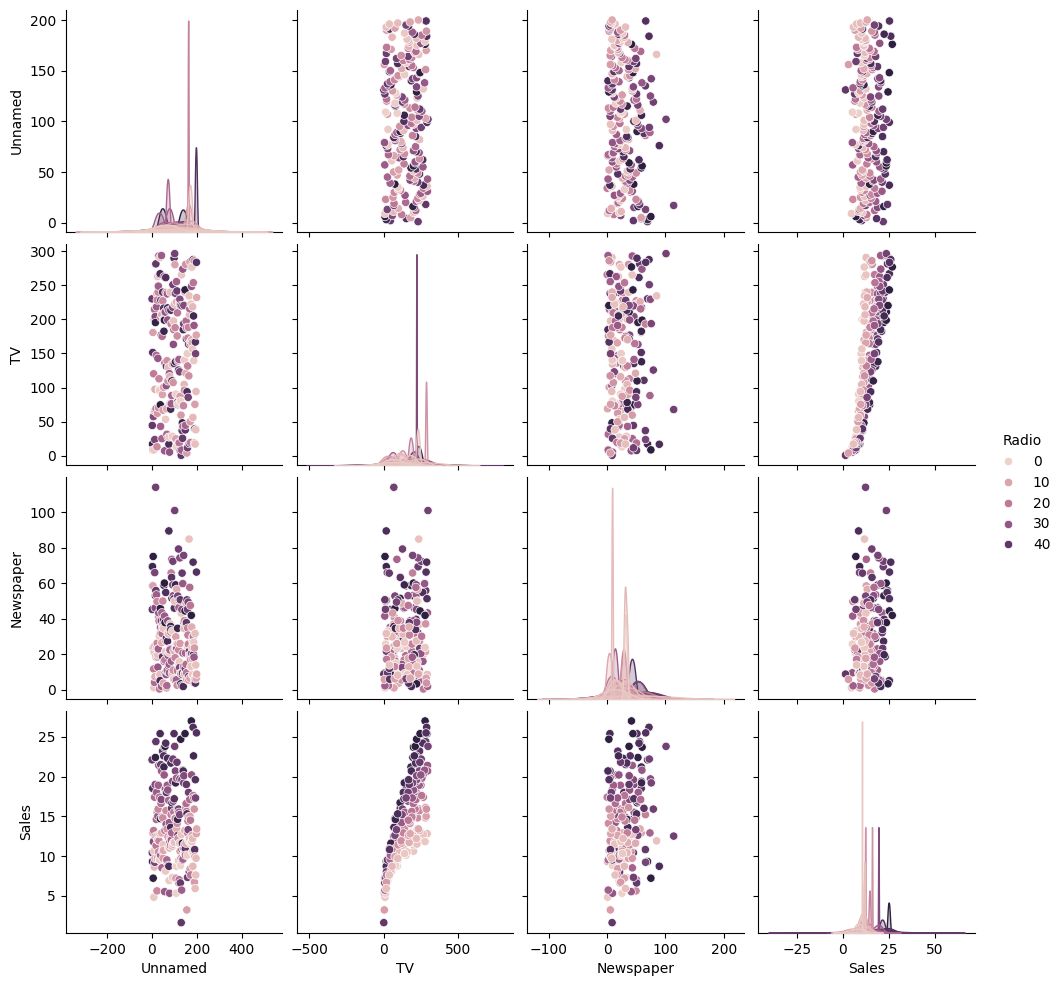

In [ ]:
#visualization of pair plot
sns.pairplot(df,hue='Radio')
plt.show()

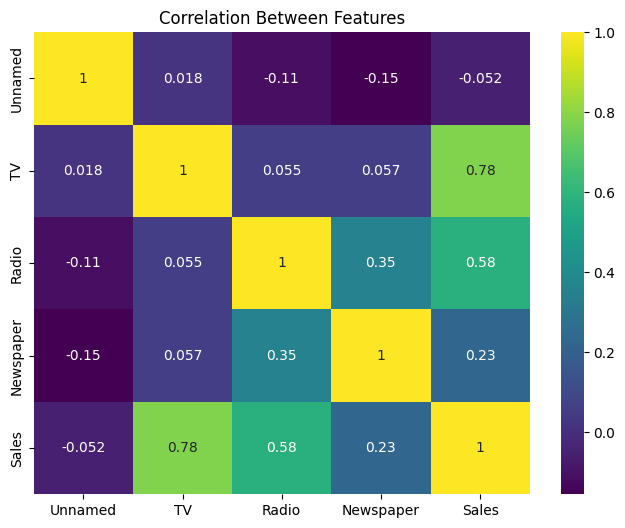

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap="viridis")
plt.title("Correlation Between Features")
plt.show()

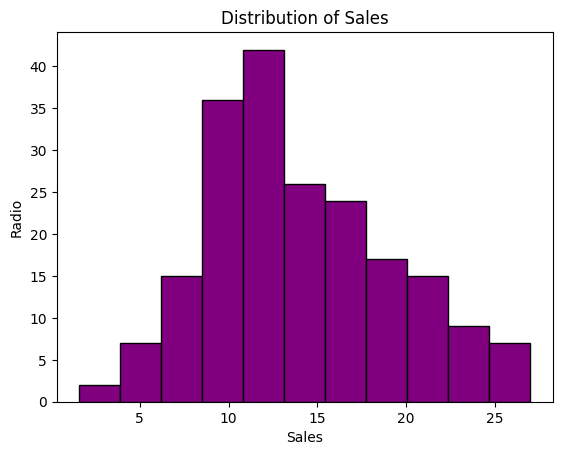

In [ ]:
#Histogram
plt.hist(df['Sales'],bins=11,color='purple',edgecolor='black')
plt.xlabel('Sales')
plt.ylabel('Radio')
plt.title('Distribution of Sales')
plt.show()


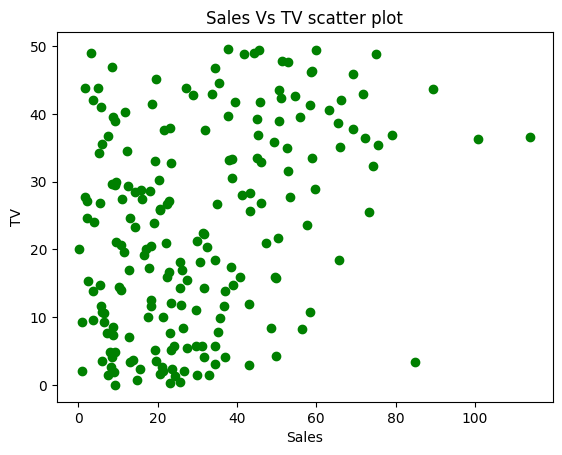

In [ ]:
#Scatter plot
plt.scatter(df['Newspaper'],df['Radio'],color='green',marker='o')
plt.xlabel('Sales')
plt.ylabel('TV')
plt.title('Sales Vs TV scatter plot')
plt.show()

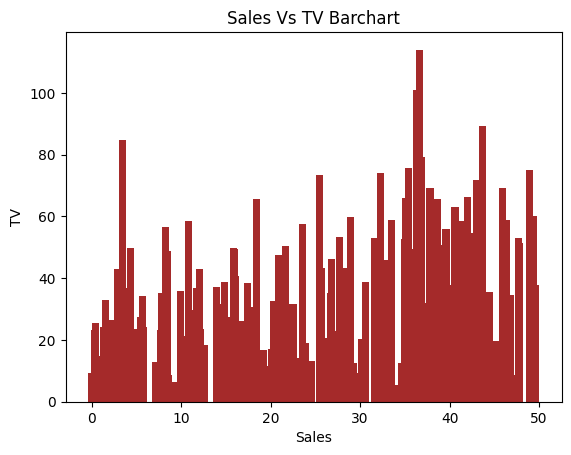

In [ ]:
#Barchart
plt.bar(df['Radio'],df['Newspaper'],color='brown')
plt.xlabel('Sales')
plt.ylabel('TV')
plt.title('Sales Vs TV Barchart')
plt.show()

In [ ]:
#preparing the data
x=df[['TV','Radio','Newspaper']]
y=df['Sales']

In [ ]:
x=df.drop('Sales',axis=1)
y=df['Sales']


In [ ]:
#Train-Test Split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
#regression model
model = LinearRegression()
model.fit(x_train, y_train)


LinearRegression()

R Score: 0.898648915141708
MSE: 3.1990044685889067


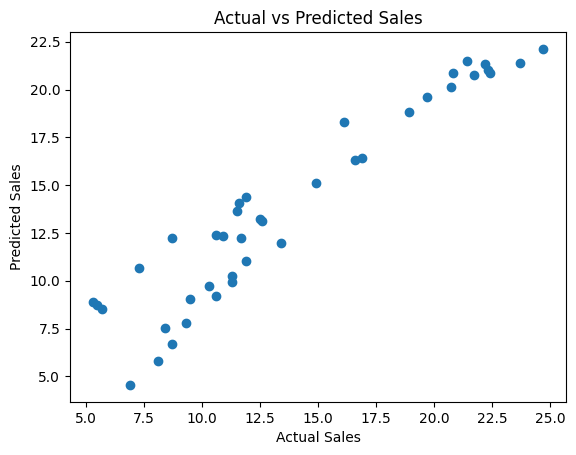

In [ ]:
#making prediction
y_pred = model.predict(x_test)
print("R Score:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales")
plt.show()

In [ ]:
#interpreting the coefficients
coefficients = pd.DataFrame(model.coef_, x.columns, columns=['Coefficient'])
print(coefficients)

           Coefficient
Unnamed       0.000644
TV            0.044718
Radio         0.189251
Newspaper     0.003046
